<a href="https://colab.research.google.com/github/Hangyeol82/AI_lab/blob/main/2%EC%A3%BC%EC%B0%A8%20%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 과제


In [ ]:
import torch
import os
import torchaudio
import torchaudio.functional as F
import torchaudio.transforms as T
import matplotlib.pyplot as plt # 시각화에 필요
import pandas as pd # 벤치마킹 결과 표시에 필요
import timeit # 벤치마킹에 필요
import librosa # 벤치마킹에 librosa 함수 사용 시 필요
import math # get_sine_sweep 등에 필요
import matplotlib.colors as mcolors # plot 함수에 필요

from IPython.display import Audio # 오디오 재생에 필요

# audio_utils.py 파일에서 필요한 함수들을 임포트합니다.
from audio_utils import plot_waveform, plot_specgram, downsample_audio, upsample_audio

print(torch.__version__)
print(torchaudio.__version__)

In [ ]:
# 샘플 불러오기 - 기존 a754d4a3 셀의 코드
audio_dir = "/content/audio_sample"
audio_files = sorted([f for f in os.listdir(audio_dir) if f.endswith(('.m4a', '.wav'))])

# Assuming there are exactly four audio files
if len(audio_files) == 4:
    file_paths = [os.path.join(audio_dir, f) for f in audio_files]

    sample1, sample_rate1 = torchaudio.load(file_paths[0])
    sample2, sample_rate2 = torchaudio.load(file_paths[1])
    sample3, sample_rate3 = torchaudio.load(file_paths[2])
    sample4, sample_rate4 = torchaudio.load(file_paths[3])

    print("Audio files loaded successfully into sample1, sample2, sample3, and sample4.")
    print(f"Sample 1 shape: {sample1.shape}, Sample rate: {sample_rate1}")
    print(f"Sample 2 shape: {sample2.shape}, Sample rate: {sample_rate2}")
    print(f"Sample 3 shape: {sample3.shape}, Sample rate: {sample_rate3}")
    print(f"Sample 4 shape: {sample4.shape}, Sample rate: {sample_rate4}")

else:
    print(f"Expected 4 audio files in {audio_dir}, but found {len(audio_files)}. Please check the directory.")

# 시각화 실행 - 기존 f352f8ec 셀의 코드 (audio_utils에서 import한 함수 사용)
print("\nVisualizing Original Audio Samples...")
plot_waveform(sample1, sample_rate1)
plot_specgram(sample1, sample_rate1, title="Spectrogram of Sample 1")
plt.show()

plot_waveform(sample2, sample_rate2)
plot_specgram(sample2, sample_rate2, title="Spectrogram of Sample 2")
plt.show()

plot_waveform(sample3, sample_rate3)
plot_specgram(sample3, sample_rate3, title="Spectrogram of Sample 3")
plt.show()

plot_waveform(sample4, sample_rate4)
plot_specgram(sample4, sample_rate4, title="Spectrogram of Sample 4")
plt.show()

In [ ]:
# 리샘플링 실행 - 기존 00156ce8 및 860f961c 셀의 코드 (audio_utils에서 import한 함수 사용)

# Define target sample rates
downsample_rate = 16000  # Example downsample rate
upsample_rate = 44100    # Example upsample rate

# List of samples and their original sample rates
samples = [
    (sample1, sample_rate1),
    (sample2, sample_rate2),
    (sample3, sample_rate3),
    (sample4, sample_rate4)
]

downsampled_samples = []

print(f"Downsampling audio to {downsample_rate} Hz...")

for i, (sample, original_sr) in enumerate(samples):
    print(f"\nProcessing sample {i+1}...")
    downsampled_waveform, new_sample_rate = downsample_audio(sample, original_sr, downsample_rate)
    downsampled_samples.append((downsampled_waveform, new_sample_rate))
    print(f"Sample {i+1} downsampled shape: {downsampled_waveform.shape}, New sample rate: {new_sample_rate}")

print("\nDownsampling complete.")

upsampled_samples = []

print(f"Upsampling audio to {upsample_rate} Hz...")

# Use the downsampled samples as input for upsampling
for i, (downsampled_sample, downsampled_sr) in enumerate(downsampled_samples):
    print(f"\nProcessing downsampled sample {i+1} for upsampling...")
    upsampled_waveform, new_sample_rate = upsample_audio(downsampled_sample, downsampled_sr, upsample_rate)
    upsampled_samples.append((upsampled_waveform, new_sample_rate))
    print(f"Downsampled sample {i+1} upsampled shape: {upsampled_waveform.shape}, New sample rate: {new_sample_rate}")

print("\nUpsampling complete.")

# 시각화 및 비교 - 기존 860f961c 셀의 코드 (audio_utils에서 import한 함수 사용)
print("\nVisualizing and comparing original, downsampled, and upsampled audio...")

for i in range(4):
    print(f"\n--- Comparing Sample {i+1} ---")

    # Original
    print("Original:")
    plot_waveform(samples[i][0], samples[i][1])
    plot_specgram(samples[i][0], samples[i][1], title=f"Spectrogram of Original Sample {i+1}")
    plt.show()

    # Downsampled
    print("Downsampled:")
    plot_waveform(downsampled_samples[i][0], downsampled_samples[i][1])
    plot_specgram(downsampled_samples[i][0], downsampled_samples[i][1], title=f"Spectrogram of Downsampled Sample {i+1}")
    plt.show()

    # Upsampled
    print("Upsampled:")
    plot_waveform(upsampled_samples[i][0], upsampled_samples[i][1])
    plot_specgram(upsampled_samples[i][0], upsampled_samples[i][1], title=f"Spectrogram of Upsampled Sample {i+1}")
    plt.show()

print("\nComparison visualization complete.")

In [ ]:
# 벤치마킹 실행 - 기존 D2tpDw-g65kE, eGcUcvVv68Th 셀의 코드
# NOTE: The get_sine_sweep and _get_log_freq, _get_inverse_log_freq, _get_freq_ticks
# functions used by benchmark and plot are not included here assuming they are
# either defined elsewhere or not strictly required for the core task based on
# the user's request to consolidate "audio code part".
# If these functions are needed, they should also be included or imported.

# Assuming get_sine_sweep, _get_log_freq, _get_inverse_log_freq, _get_freq_ticks are available

DEFAULT_OFFSET = 201 # Define DEFAULT_OFFSET if not defined elsewhere

def benchmark_resample_functional(
    waveform,
    sample_rate,
    resample_rate,
    lowpass_filter_width=6,
    rolloff=0.99,
    resampling_method="sinc_interp_hann",
    beta=None,
    iters=5,
):
    return (
        timeit.timeit(
            stmt="""
torchaudio.functional.resample(
    waveform,
    sample_rate,
    resample_rate,
    lowpass_filter_width=lowpass_filter_width,
    rolloff=rolloff,
    resampling_method=resampling_method,
    beta=beta,
)
        """,
            setup="import torchaudio",
            number=iters,
            globals=locals(),
        )
        * 1000
        / iters
    )

def benchmark_resample_transforms(
    waveform,
    sample_rate,
    resample_rate,
    lowpass_filter_width=6,
    rolloff=0.99,
    resampling_method="sinc_interp_hann",
    beta=None,
    iters=5,
):
    return (
        timeit.timeit(
            stmt="resampler(waveform)",
            setup="""
import torchaudio
import torchaudio.transforms as T # Import T here for the setup string

resampler = T.Resample(
    sample_rate,
    resample_rate,
    lowpass_filter_width=lowpass_filter_width,
    rolloff=rolloff,
    resampling_method=resampling_method,
    dtype=waveform.dtype,
    beta=beta,
)
resampler.to(waveform.device)
        """,
            number=iters,
            globals=locals(),
        )
        * 1000
        / iters
    )

def benchmark_resample_librosa(
    waveform,
    sample_rate,
    resample_rate,
    res_type=None,
    iters=5,
):
    waveform_np = waveform.squeeze().numpy()
    return (
        timeit.timeit(
            stmt="""
librosa.resample(
    waveform_np,
    orig_sr=sample_rate,
    target_sr=resample_rate,
    res_type=res_type,
)
        """,
            setup="import librosa",
            number=iters,
            globals=locals(),
        )
        * 1000
        / iters
    )

def benchmark(sample_rate, resample_rate):
    times, rows = [], []
    # Assuming get_sine_sweep is available
    waveform = get_sine_sweep(sample_rate).to(torch.float32)

    args = (waveform, sample_rate, resample_rate)

    # sinc 64 zero-crossings
    f_time = benchmark_resample_functional(*args, lowpass_filter_width=64)
    t_time = benchmark_resample_transforms(*args, lowpass_filter_width=64)
    times.append([None, f_time, t_time])
    rows.append("sinc (width 64)")

    # sinc 16 zero-crossings
    f_time = benchmark_resample_functional(*args, lowpass_filter_width=16)
    t_time = benchmark_resample_transforms(*args, lowpass_filter_width=16)
    times.append([None, f_time, t_time])
    rows.append("sinc (width 16)")

    # kaiser best
    kwargs = {
        "lowpass_filter_width": 64,
        "rolloff": 0.9475937167399596,
        "resampling_method": "sinc_interp_kaiser",
        "beta": 14.769656459379492,
    }
    lib_time = benchmark_resample_librosa(*args, res_type="kaiser_best")
    f_time = benchmark_resample_functional(*args, **kwargs)
    t_time = benchmark_resample_transforms(*args, **kwargs)
    times.append([lib_time, f_time, t_time])
    rows.append("kaiser_best")

    # kaiser fast
    kwargs = {
        "lowpass_filter_width": 16,
        "rolloff": 0.85,
        "resampling_method": "sinc_interp_kaiser",
        "beta": 8.555504641634386,
    }
    lib_time = benchmark_resample_librosa(*args, res_type="kaiser_fast")
    f_time = benchmark_resample_functional(*args, **kwargs)
    t_time = benchmark_resample_transforms(*args, **kwargs)
    times.append([lib_time, f_time, t_time])
    rows.append("kaiser_fast")

    df = pd.DataFrame(times, columns=["librosa", "functional", "transforms"], index=rows)
    return df

def plot(df): # Define plot function if not defined elsewhere
    print(df.round(2))
    ax = df.plot(kind="bar")
    plt.ylabel("Time Elapsed [ms]")
    plt.xticks(rotation=0, fontsize=10)
    for cont, col, color in zip(ax.containers, df.columns, mcolors.TABLEAU_COLORS):
        label = ["N/A" if v != v else str(v) for v in df[col].round(2)]
        ax.bar_label(cont, labels=label, color=color, fontweight="bold", fontsize="x-small")

# Example usage of benchmark and plot
# sample_rate_benchmark = 48000
# resample_rate_benchmark = 44100
# df_benchmark = benchmark(sample_rate_benchmark, resample_rate_benchmark)
# plot(df_benchmark)

In [10]:
import torch
import os
import torchaudio
import torchaudio.functional as F
import torchaudio.transforms as T

print(torch.__version__)
print(torchaudio.__version__)

2.8.0+cu126
2.8.0+cu126


In [8]:
import math
import timeit

import librosa
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import pandas as pd
import resampy
from IPython.display import Audio

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

DEFAULT_OFFSET = 201


def _get_log_freq(sample_rate, max_sweep_rate, offset):
    """Get freqs evenly spaced out in log-scale, between [0, max_sweep_rate // 2]

    offset is used to avoid negative infinity `log(offset + x)`.

    """
    start, stop = math.log(offset), math.log(offset + max_sweep_rate // 2)
    return torch.exp(torch.linspace(start, stop, sample_rate, dtype=torch.double)) - offset


def _get_inverse_log_freq(freq, sample_rate, offset):
    """Find the time where the given frequency is given by _get_log_freq"""
    half = sample_rate // 2
    return sample_rate * (math.log(1 + freq / offset) / math.log(1 + half / offset))


def _get_freq_ticks(sample_rate, offset, f_max):
    # Given the original sample rate used for generating the sweep,
    # find the x-axis value where the log-scale major frequency values fall in
    times, freq = [], []
    for exp in range(2, 5):
        for v in range(1, 10):
            f = v * 10**exp
            if f < sample_rate // 2:
                t = _get_inverse_log_freq(f, sample_rate, offset) / sample_rate
                times.append(t)
                freq.append(f)
    t_max = _get_inverse_log_freq(f_max, sample_rate, offset) / sample_rate
    times.append(t_max)
    freq.append(f_max)
    return times, freq


def get_sine_sweep(sample_rate, offset=DEFAULT_OFFSET):
    max_sweep_rate = sample_rate
    freq = _get_log_freq(sample_rate, max_sweep_rate, offset)
    delta = 2 * math.pi * freq / sample_rate
    cummulative = torch.cumsum(delta, dim=0)
    signal = torch.sin(cummulative).unsqueeze(dim=0)
    return signal


def plot_sweep(
    waveform,
    sample_rate,
    title,
    max_sweep_rate=48000,
    offset=DEFAULT_OFFSET,
):
    x_ticks = [100, 500, 1000, 5000, 10000, 20000, max_sweep_rate // 2]
    y_ticks = [1000, 5000, 10000, 20000, sample_rate // 2]

    time, freq = _get_freq_ticks(max_sweep_rate, offset, sample_rate // 2)
    freq_x = [f if f in x_ticks and f <= max_sweep_rate // 2 else None for f in freq]
    freq_y = [f for f in freq if f in y_ticks and 1000 <= f <= sample_rate // 2]

    figure, axis = plt.subplots(1, 1)
    _, _, _, cax = axis.specgram(waveform[0].numpy(), Fs=sample_rate)
    plt.xticks(time, freq_x)
    plt.yticks(freq_y, freq_y)
    axis.set_xlabel("Original Signal Frequency (Hz, log scale)")
    axis.set_ylabel("Waveform Frequency (Hz)")
    axis.xaxis.grid(True, alpha=0.67)
    axis.yaxis.grid(True, alpha=0.67)
    figure.suptitle(f"{title} (sample rate: {sample_rate} Hz)")
    plt.colorbar(cax)

In [12]:
# 샘플 불러오기
audio_dir = "/content/audio_sample"
audio_files = sorted([f for f in os.listdir(audio_dir) if f.endswith(('.m4a', '.wav'))])

# Assuming there are exactly four audio files
if len(audio_files) == 4:
    file_paths = [os.path.join(audio_dir, f) for f in audio_files]

    sample1, sample_rate1 = torchaudio.load(file_paths[0])
    sample2, sample_rate2 = torchaudio.load(file_paths[1])
    sample3, sample_rate3 = torchaudio.load(file_paths[2])
    sample4, sample_rate4 = torchaudio.load(file_paths[3])

    print("Audio files loaded successfully into sample1, sample2, sample3, and sample4.")
    print(f"Sample 1 shape: {sample1.shape}, Sample rate: {sample_rate1}")
    print(f"Sample 2 shape: {sample2.shape}, Sample rate: {sample_rate2}")
    print(f"Sample 3 shape: {sample3.shape}, Sample rate: {sample_rate3}")
    print(f"Sample 4 shape: {sample4.shape}, Sample rate: {sample_rate4}")

else:
    print(f"Expected 4 audio files in {audio_dir}, but found {len(audio_files)}. Please check the directory.")

Audio files loaded successfully into sample1, sample2, sample3, and sample4.
Sample 1 shape: torch.Size([1, 177152]), Sample rate: 44100
Sample 2 shape: torch.Size([1, 177152]), Sample rate: 44100
Sample 3 shape: torch.Size([1, 177152]), Sample rate: 44100
Sample 4 shape: torch.Size([1, 177152]), Sample rate: 44100


/usr/local/lib/python3.12/dist-packages/torchaudio/_backend/utils.py:213: UserWarning: In 2.9, this function's implementation will be changed to use torchaudio.load_with_torchcodec` under the hood. Some parameters like ``normalize``, ``format``, ``buffer_size``, and ``backend`` will be ignored. We recommend that you port your code to rely directly on TorchCodec's decoder instead: https://docs.pytorch.org/torchcodec/stable/generated/torchcodec.decoders.AudioDecoder.html#torchcodec.decoders.AudioDecoder.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchaudio/_backend/ffmpeg.py:88: UserWarning: torio.io._streaming_media_decoder.StreamingMediaDecoder has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be r

In [3]:
def plot_waveform(waveform, sample_rate):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].plot(time_axis, waveform[c], linewidth=1)
        axes[c].grid(True)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle("waveform")

In [4]:
def plot_specgram(waveform, sample_rate, title="Spectrogram"):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].specgram(waveform[c], Fs=sample_rate)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle(title)

/usr/local/lib/python3.12/dist-packages/matplotlib/axes/_axes.py:8233: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


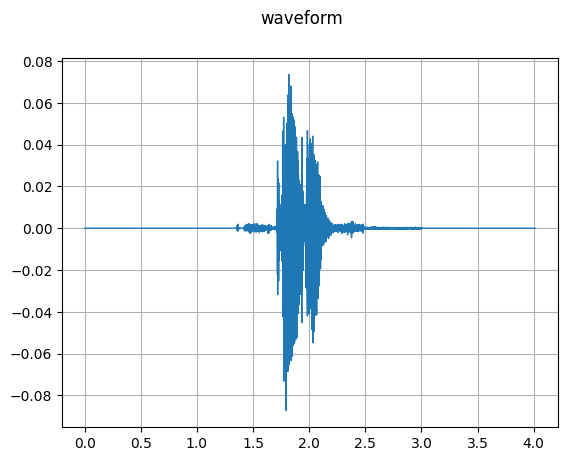

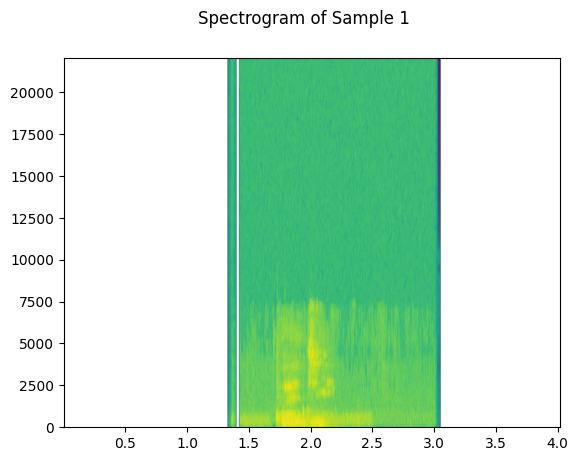

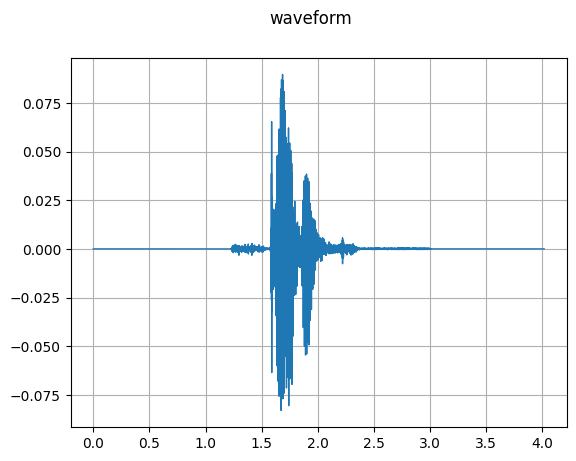

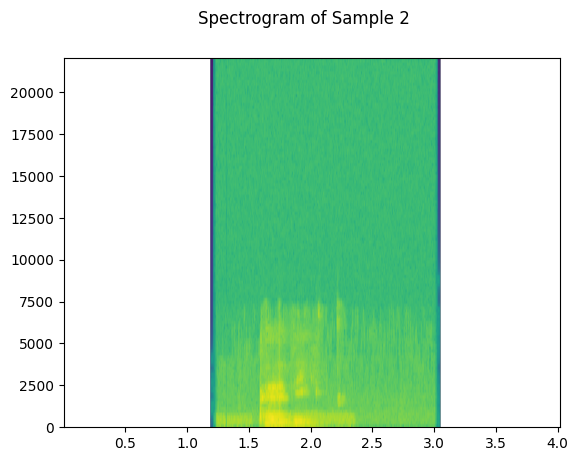

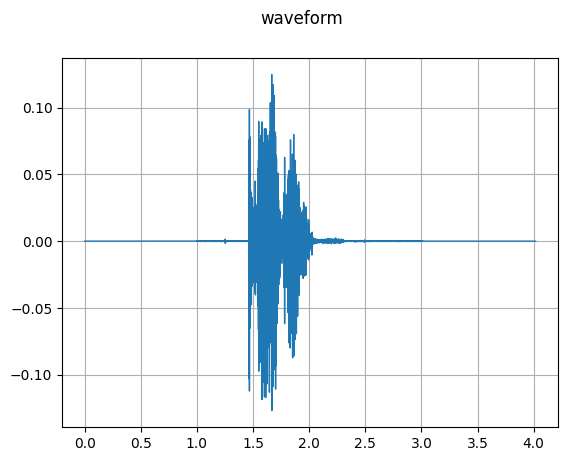

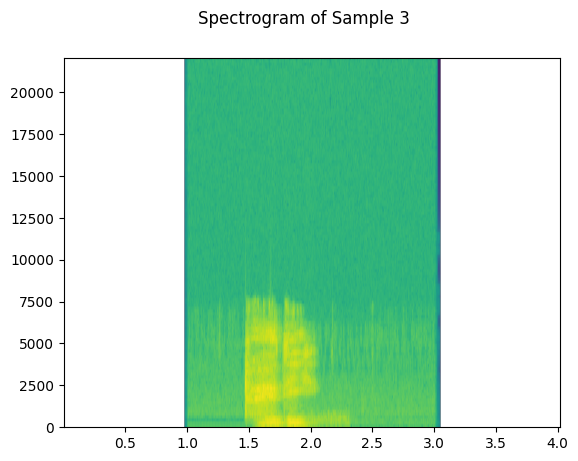

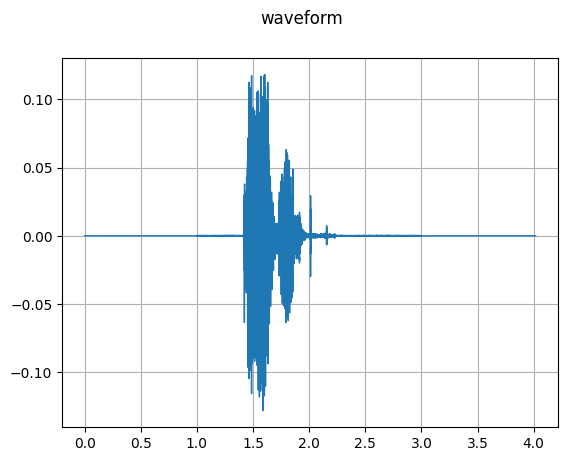

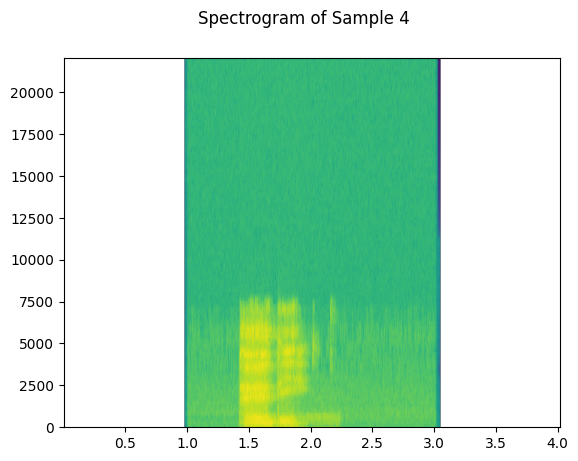

In [16]:
# Visualize sample 1
plot_waveform(sample1, sample_rate1)
plot_specgram(sample1, sample_rate1, title="Spectrogram of Sample 1")
plt.show()

# Visualize sample 2
plot_waveform(sample2, sample_rate2)
plot_specgram(sample2, sample_rate2, title="Spectrogram of Sample 2")
plt.show()

# Visualize sample 3
plot_waveform(sample3, sample_rate3)
plot_specgram(sample3, sample_rate3, title="Spectrogram of Sample 3")
plt.show()

# Visualize sample 4
plot_waveform(sample4, sample_rate4)
plot_specgram(sample4, sample_rate4, title="Spectrogram of Sample 4")
plt.show()

In [24]:
def benchmark_resample_functional(
    waveform,
    sample_rate,
    resample_rate,
    lowpass_filter_width=6,
    rolloff=0.99,
    resampling_method="sinc_interp_hann",
    beta=None,
    iters=5,
):
    return (
        timeit.timeit(
            stmt="""
torchaudio.functional.resample(
    waveform,
    sample_rate,
    resample_rate,
    lowpass_filter_width=lowpass_filter_width,
    rolloff=rolloff,
    resampling_method=resampling_method,
    beta=beta,
)
        """,
            setup="import torchaudio",
            number=iters,
            globals=locals(),
        )
        * 1000
        / iters
    )

In [25]:
def benchmark_resample_transforms(
    waveform,
    sample_rate,
    resample_rate,
    lowpass_filter_width=6,
    rolloff=0.99,
    resampling_method="sinc_interp_hann",
    beta=None,
    iters=5,
):
    return (
        timeit.timeit(
            stmt="resampler(waveform)",
            setup="""
import torchaudio

resampler = torchaudio.transforms.Resample(
    sample_rate,
    resample_rate,
    lowpass_filter_width=lowpass_filter_width,
    rolloff=rolloff,
    resampling_method=resampling_method,
    dtype=waveform.dtype,
    beta=beta,
)
resampler.to(waveform.device)
        """,
            number=iters,
            globals=locals(),
        )
        * 1000
        / iters
    )

In [26]:
def benchmark_resample_librosa(
    waveform,
    sample_rate,
    resample_rate,
    res_type=None,
    iters=5,
):
    waveform_np = waveform.squeeze().numpy()
    return (
        timeit.timeit(
            stmt="""
librosa.resample(
    waveform_np,
    orig_sr=sample_rate,
    target_sr=resample_rate,
    res_type=res_type,
)
        """,
            setup="import librosa",
            number=iters,
            globals=locals(),
        )
        * 1000
        / iters
    )


In [27]:
def benchmark(sample_rate, resample_rate):
    times, rows = [], []
    waveform = get_sine_sweep(sample_rate).to(torch.float32)

    args = (waveform, sample_rate, resample_rate)

    # sinc 64 zero-crossings
    f_time = benchmark_resample_functional(*args, lowpass_filter_width=64)
    t_time = benchmark_resample_transforms(*args, lowpass_filter_width=64)
    times.append([None, f_time, t_time])
    rows.append("sinc (width 64)")

    # sinc 6 zero-crossings
    f_time = benchmark_resample_functional(*args, lowpass_filter_width=16)
    t_time = benchmark_resample_transforms(*args, lowpass_filter_width=16)
    times.append([None, f_time, t_time])
    rows.append("sinc (width 16)")

    # kaiser best
    kwargs = {
        "lowpass_filter_width": 64,
        "rolloff": 0.9475937167399596,
        "resampling_method": "sinc_interp_kaiser",
        "beta": 14.769656459379492,
    }
    lib_time = benchmark_resample_librosa(*args, res_type="kaiser_best")
    f_time = benchmark_resample_functional(*args, **kwargs)
    t_time = benchmark_resample_transforms(*args, **kwargs)
    times.append([lib_time, f_time, t_time])
    rows.append("kaiser_best")

    # kaiser fast
    kwargs = {
        "lowpass_filter_width": 16,
        "rolloff": 0.85,
        "resampling_method": "sinc_interp_kaiser",
        "beta": 8.555504641634386,
    }
    lib_time = benchmark_resample_librosa(*args, res_type="kaiser_fast")
    f_time = benchmark_resample_functional(*args, **kwargs)
    t_time = benchmark_resample_transforms(*args, **kwargs)
    times.append([lib_time, f_time, t_time])
    rows.append("kaiser_fast")

    df = pd.DataFrame(times, columns=["librosa", "functional", "transforms"], index=rows)
    return df

In [28]:
def plot(df):
    print(df.round(2))
    ax = df.plot(kind="bar")
    plt.ylabel("Time Elapsed [ms]")
    plt.xticks(rotation=0, fontsize=10)
    for cont, col, color in zip(ax.containers, df.columns, mcolors.TABLEAU_COLORS):
        label = ["N/A" if v != v else str(v) for v in df[col].round(2)]
        ax.bar_label(cont, labels=label, color=color, fontweight="bold", fontsize="x-small")

In [32]:
%%writefile audio_utils.py
import torch
import torchaudio
import torchaudio.transforms as T
import matplotlib.pyplot as plt
import numpy as np
import math

# Define the functions related to plotting waveforms and spectrograms
def plot_waveform(waveform, sample_rate):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].plot(time_axis, waveform[c], linewidth=1)
        axes[c].grid(True)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle("waveform")

def plot_specgram(waveform, sample_rate, title="Spectrogram"):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].specgram(waveform[c], Fs=sample_rate)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle(title)

# Define the downsample and upsample functions
def downsample_audio(waveform, original_sample_rate, target_sample_rate):
    """Downsamples a waveform to a target sample rate."""
    if original_sample_rate <= target_sample_rate:
        print(f"Warning: Original sample rate ({original_sample_rate}) is not higher than target sample rate ({target_sample_rate}). No downsampling needed.")
        return waveform, original_sample_rate
    resampler = T.Resample(original_sample_rate, target_sample_rate, dtype=waveform.dtype)
    resampled_waveform = resampler(waveform)
    return resampled_waveform, target_sample_rate

def upsample_audio(waveform, original_sample_rate, target_sample_rate):
    """Upsamples a waveform to a target sample rate."""
    if original_sample_rate >= target_sample_rate:
         print(f"Warning: Original sample rate ({original_sample_rate}) is not lower than target sample rate ({target_sample_rate}). No upsampling needed.")
         return waveform, original_sample_rate
    resampler = T.Resample(original_sample_rate, target_sample_rate, dtype=waveform.dtype)
    resampled_waveform = resampler(waveform)
    return resampled_waveform, target_sample_rate

# You might also want to include other utility functions if needed,
# such as get_sine_sweep, plot_sweep, etc., depending on what you consider "audio code".
# For now, I'll include the plotting and resampling functions.

Writing audio_utils.py


Upsampling audio to 44100 Hz...

Processing downsampled sample 1 for upsampling...
Downsampled sample 1 upsampled shape: torch.Size([1, 177153]), New sample rate: 44100

Processing downsampled sample 2 for upsampling...
Downsampled sample 2 upsampled shape: torch.Size([1, 177153]), New sample rate: 44100

Processing downsampled sample 3 for upsampling...
Downsampled sample 3 upsampled shape: torch.Size([1, 177153]), New sample rate: 44100

Processing downsampled sample 4 for upsampling...
Downsampled sample 4 upsampled shape: torch.Size([1, 177153]), New sample rate: 44100

Upsampling complete.

Visualizing and comparing original, downsampled, and upsampled audio...

--- Comparing Sample 1 ---
Original:


/usr/local/lib/python3.12/dist-packages/matplotlib/axes/_axes.py:8233: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


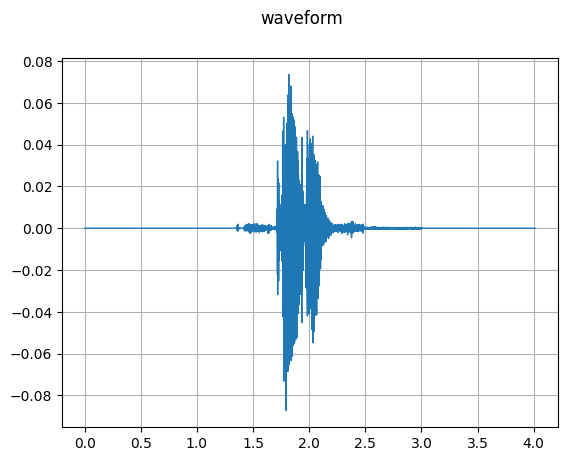

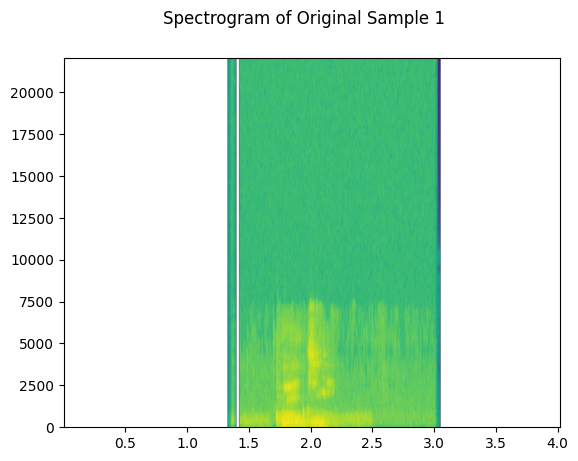

Downsampled:


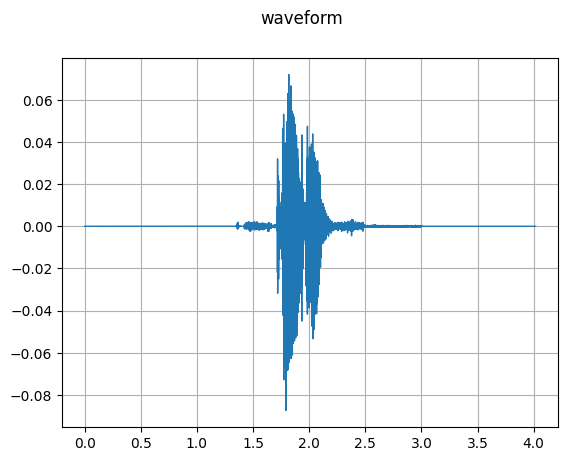

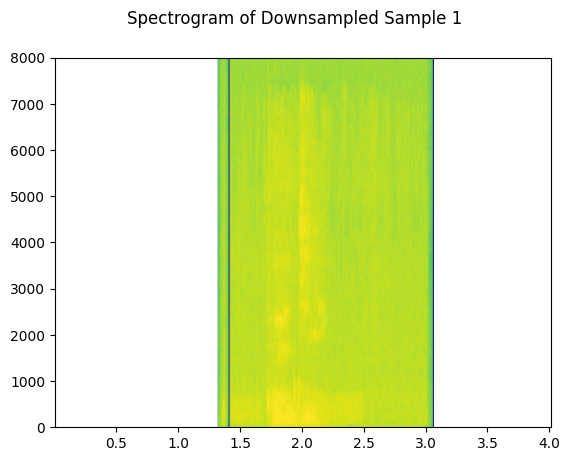

Upsampled:


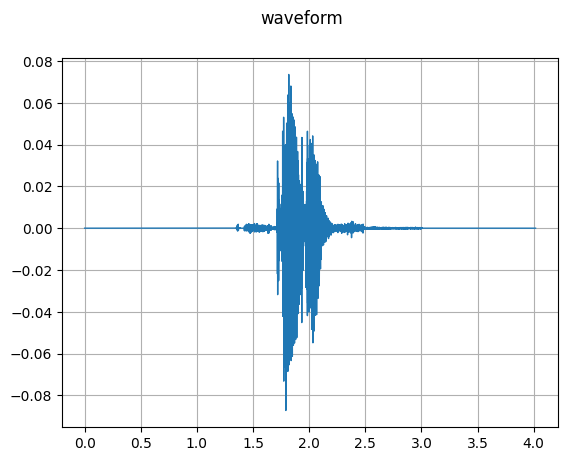

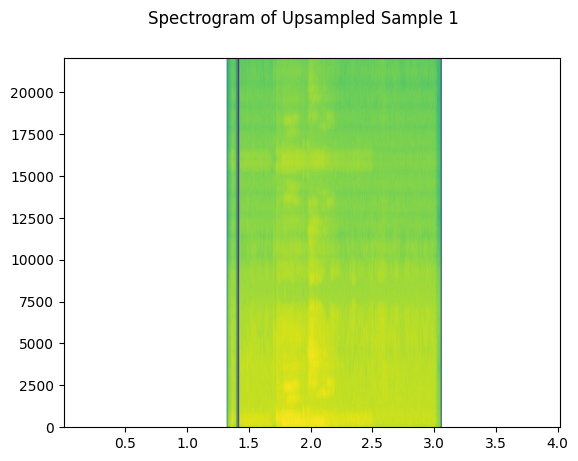


--- Comparing Sample 2 ---
Original:


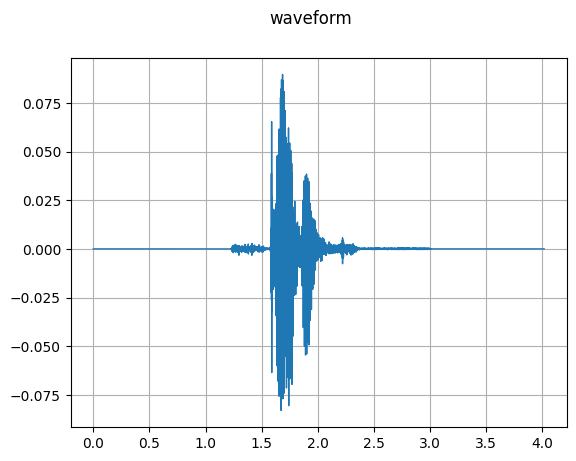

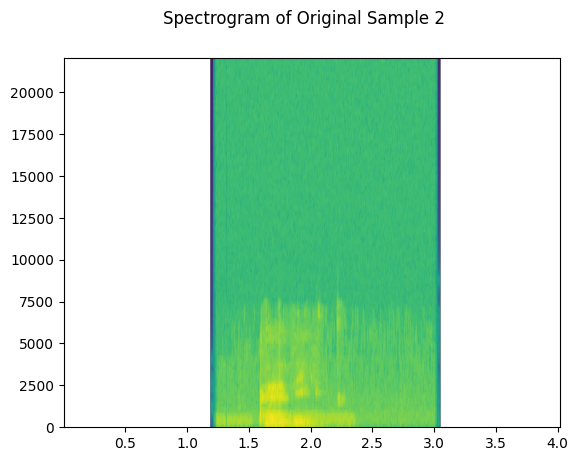

Downsampled:


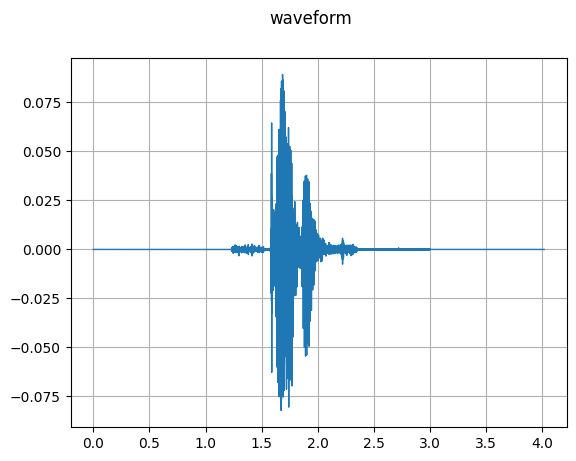

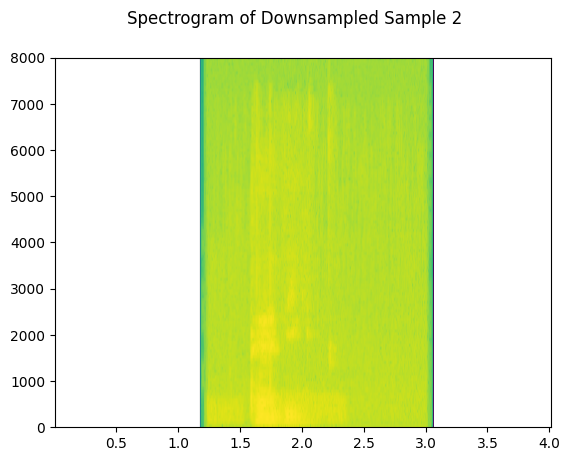

Upsampled:


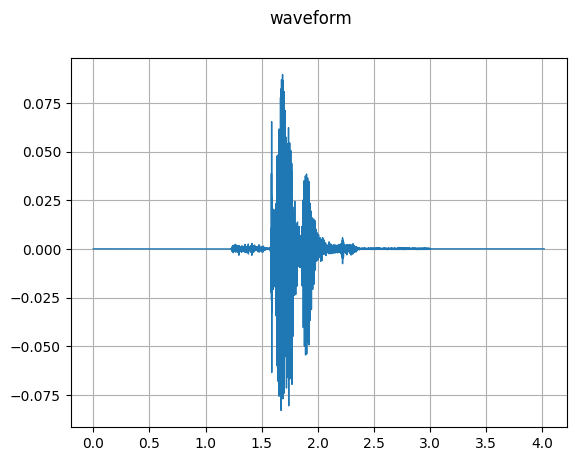

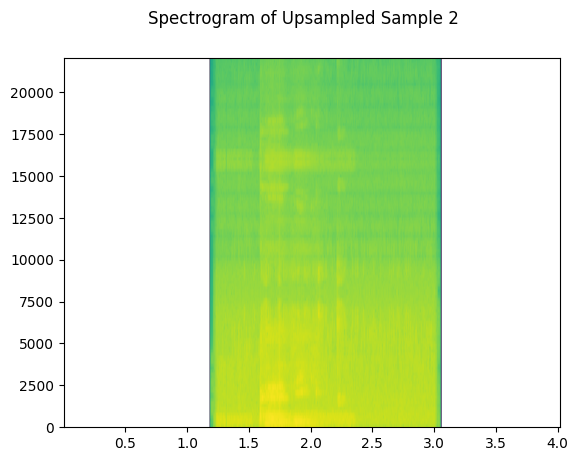


--- Comparing Sample 3 ---
Original:


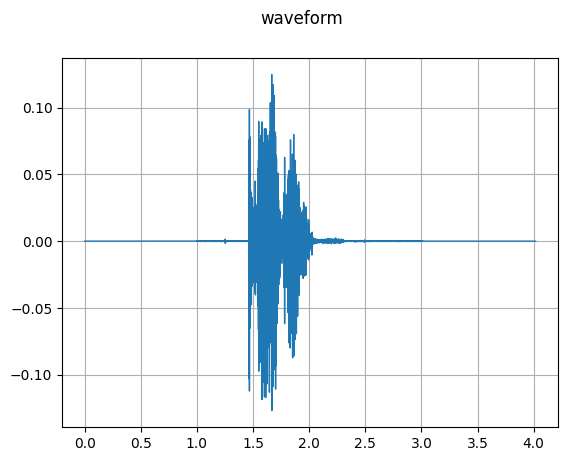

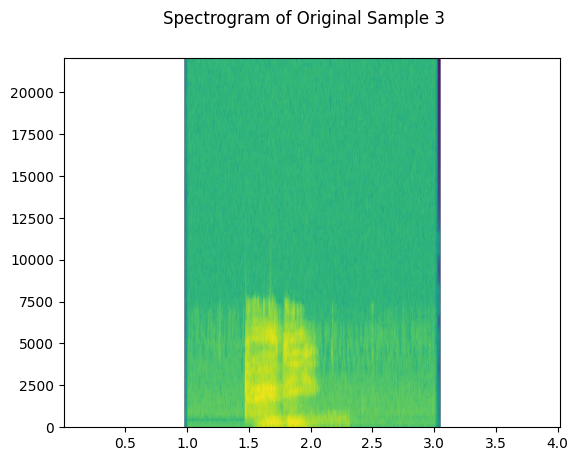

Downsampled:


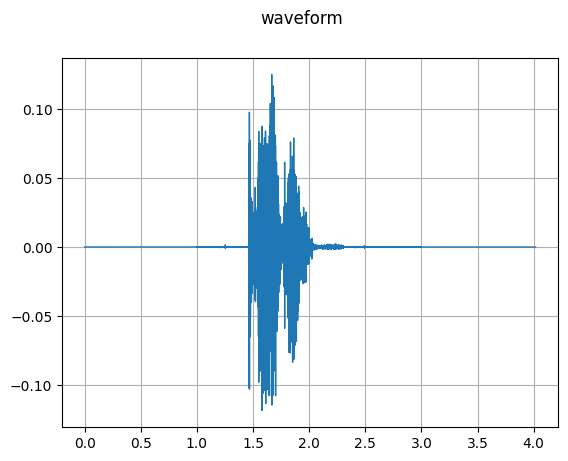

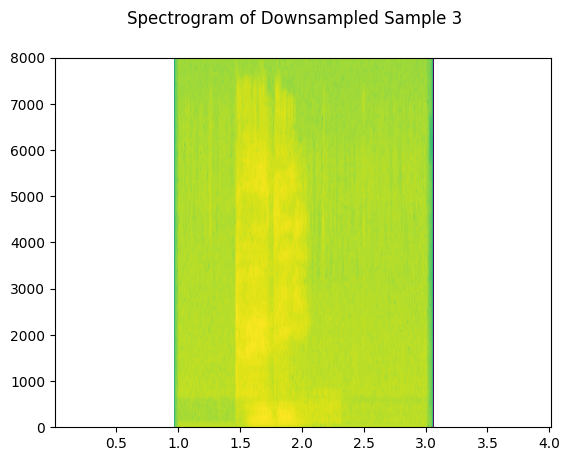

Upsampled:


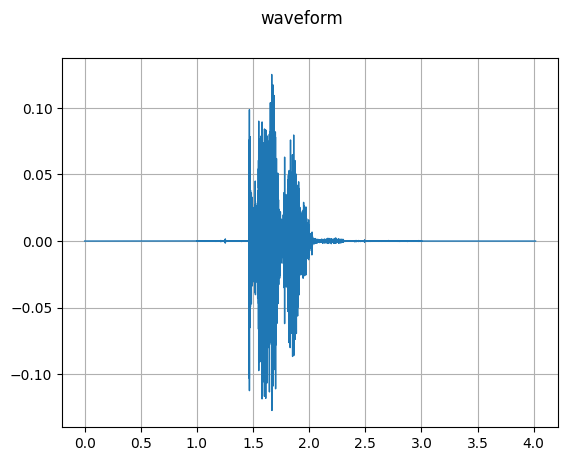

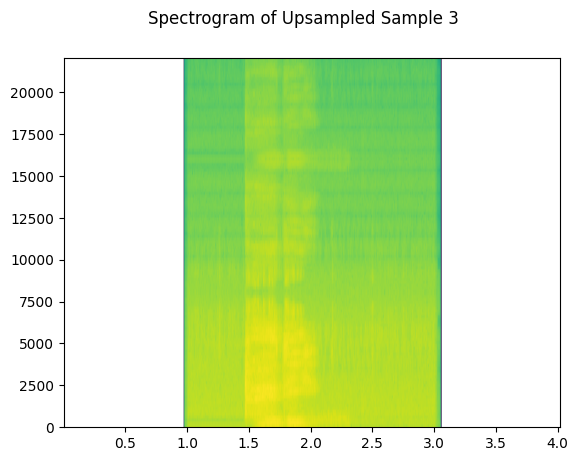


--- Comparing Sample 4 ---
Original:


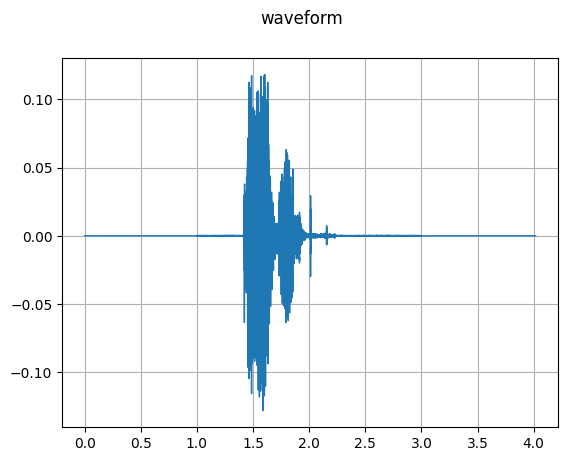

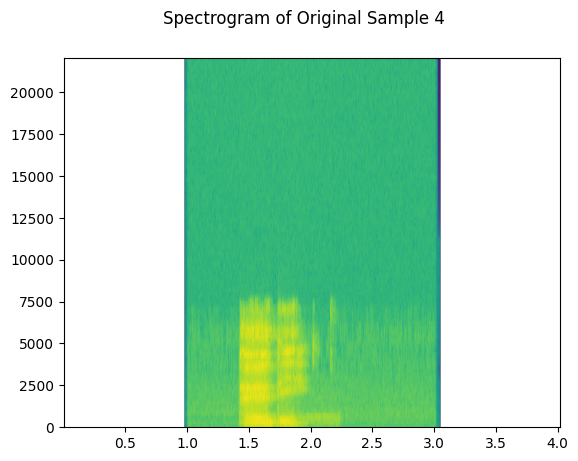

Downsampled:


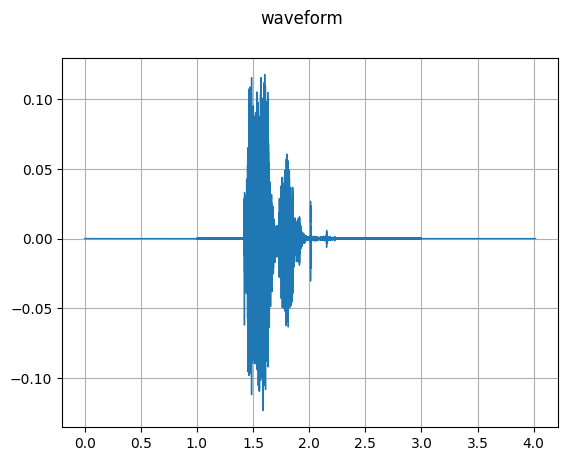

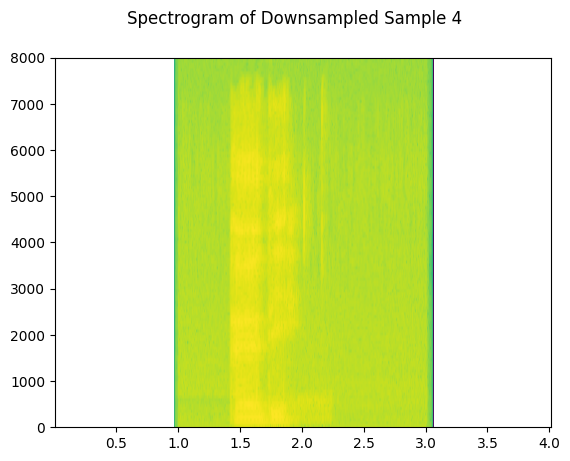

Upsampled:


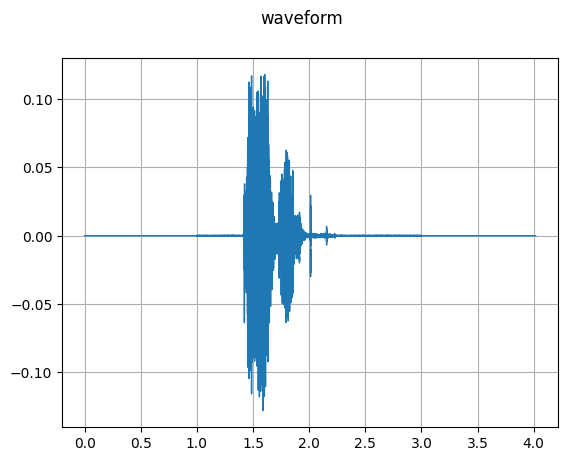

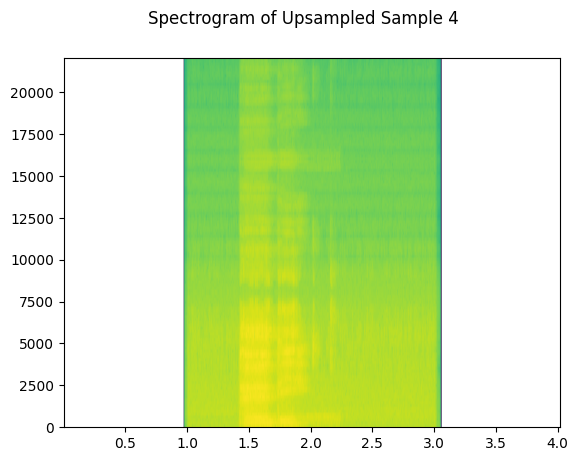


Comparison visualization complete.


In [31]:
upsampled_samples = []

print(f"Upsampling audio to {upsample_rate} Hz...")

# Use the downsampled samples as input for upsampling
for i, (downsampled_sample, downsampled_sr) in enumerate(downsampled_samples):
    print(f"\nProcessing downsampled sample {i+1} for upsampling...")
    upsampled_waveform, new_sample_rate = upsample_audio(downsampled_sample, downsampled_sr, upsample_rate)
    upsampled_samples.append((upsampled_waveform, new_sample_rate))
    print(f"Downsampled sample {i+1} upsampled shape: {upsampled_waveform.shape}, New sample rate: {new_sample_rate}")

print("\nUpsampling complete.")

# Now visualize and compare
print("\nVisualizing and comparing original, downsampled, and upsampled audio...")

for i in range(4):
    print(f"\n--- Comparing Sample {i+1} ---")

    # Original
    print("Original:")
    plot_waveform(samples[i][0], samples[i][1])
    plot_specgram(samples[i][0], samples[i][1], title=f"Spectrogram of Original Sample {i+1}")
    plt.show()

    # Downsampled
    print("Downsampled:")
    plot_waveform(downsampled_samples[i][0], downsampled_samples[i][1])
    plot_specgram(downsampled_samples[i][0], downsampled_samples[i][1], title=f"Spectrogram of Downsampled Sample {i+1}")
    plt.show()

    # Upsampled
    print("Upsampled:")
    plot_waveform(upsampled_samples[i][0], upsampled_samples[i][1])
    plot_specgram(upsampled_samples[i][0], upsampled_samples[i][1], title=f"Spectrogram of Upsampled Sample {i+1}")
    plt.show()

print("\nComparison visualization complete.")

In [30]:
# Define target sample rates
downsample_rate = 16000  # Example downsample rate
upsample_rate = 44100    # Example upsample rate

# List of samples and their original sample rates
samples = [
    (sample1, sample_rate1),
    (sample2, sample_rate2),
    (sample3, sample_rate3),
    (sample4, sample_rate4)
]

downsampled_samples = []

print(f"Downsampling audio to {downsample_rate} Hz...")

for i, (sample, original_sr) in enumerate(samples):
    print(f"\nProcessing sample {i+1}...")
    downsampled_waveform, new_sample_rate = downsample_audio(sample, original_sr, downsample_rate)
    downsampled_samples.append((downsampled_waveform, new_sample_rate))
    print(f"Sample {i+1} downsampled shape: {downsampled_waveform.shape}, New sample rate: {new_sample_rate}")

print("\nDownsampling complete.")

Downsampling audio to 16000 Hz...

Processing sample 1...
Sample 1 downsampled shape: torch.Size([1, 64273]), New sample rate: 16000

Processing sample 2...
Sample 2 downsampled shape: torch.Size([1, 64273]), New sample rate: 16000

Processing sample 3...
Sample 3 downsampled shape: torch.Size([1, 64273]), New sample rate: 16000

Processing sample 4...
Sample 4 downsampled shape: torch.Size([1, 64273]), New sample rate: 16000

Downsampling complete.


In [29]:
import torchaudio.transforms as T

def downsample_audio(waveform, original_sample_rate, target_sample_rate):
    """Downsamples a waveform to a target sample rate."""
    if original_sample_rate <= target_sample_rate:
        print(f"Warning: Original sample rate ({original_sample_rate}) is not higher than target sample rate ({target_sample_rate}). No downsampling needed.")
        return waveform, original_sample_rate
    resampler = T.Resample(original_sample_rate, target_sample_rate, dtype=waveform.dtype)
    resampled_waveform = resampler(waveform)
    return resampled_waveform, target_sample_rate

def upsample_audio(waveform, original_sample_rate, target_sample_rate):
    """Upsamples a waveform to a target sample rate."""
    if original_sample_rate >= target_sample_rate:
         print(f"Warning: Original sample rate ({original_sample_rate}) is not lower than target sample rate ({target_sample_rate}). No upsampling needed.")
         return waveform, original_sample_rate
    resampler = T.Resample(original_sample_rate, target_sample_rate, dtype=waveform.dtype)
    resampled_waveform = resampler(waveform)
    return resampled_waveform, target_sample_rate